In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/credit_fraud.csv')
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


# 데이터 EDA & 전처리

## 기본 정보

In [3]:
df.shape

(150000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [5]:
# 결측치가 있다.
df.isnull().sum()

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address               127
user_agent               113
email_domain              90
phone_number             127
billing_city             116
billing_postal           124
billing_state            113
card_bin                 128
currency                 108
cvv                      123
signature_image          105
transaction_type         116
transaction_env          123
EVENT_TIMESTAMP          112
applicant_name           143
billing_address          134
merchant_id              107
locale                   134
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64

In [6]:
# 결측치의 개수가 적어서 삭제를 진행하기로 한다. - 3천개의 데이터 삭제
df = df.dropna(axis=0)
df.shape

(147000, 26)

In [7]:
# 클래스 불균형 심각
df['EVENT_LABEL'].value_counts()

legit    138996
fraud      8004
Name: EVENT_LABEL, dtype: int64

In [8]:
# 5% 정도가 사기 거래
df['EVENT_LABEL'].value_counts()[1] / len(df) * 100

5.444897959183673

In [9]:
df.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000,147000.000000
mean,4645.817224,2521.343592,54.208837,4702.388673,50179.458129,41834.312320,49.858524,7996.856367
std,1153.792072,604.680167,10.068128,1188.255402,28389.219411,10082.094148,29.208844,4047.922681
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25298.000000,35386.000000,24.000000,4485.000000
50%,4668.000000,2543.000000,55.000000,4729.000000,50072.000000,42086.000000,50.000000,7999.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74346.000000,47373.000000,75.000000,11495.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [10]:
# user_agent 특징에서 브라우저 name만 선택해서 진행
df['user_agent'] = df['user_agent'].apply(lambda x: x.split('/')[0])
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [11]:
df['user_agent'].value_counts()

Mozilla    111613
Opera       35387
Name: user_agent, dtype: int64

## 변수(특징) 탐색

In [12]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

In [13]:
for col in df.columns:
    print(f'{col} - nums : {len(df[col].unique())} EA')
    print(f'{df[col].unique()}')
    print('_'*40)

account_age_days - nums : 6465 EA
[3371. 2714. 6987. ... 1578. 7953. 1533.]
________________________________________
transaction_amt - nums : 3687 EA
[2167. 2045. 2892. ... 4062.  446. 4274.]
________________________________________
transaction_adj_amt - nums : 92 EA
[56. 48. 61. 28. 66. 50. 59. 53. 55. 72. 32. 58. 51. 62. 65. 43. 47. 54.
 70. 46. 39. 63. 57. 45. 44. 64. 35. 52. 60. 34. 69. 41. 68. 38. 37. 42.
 71. 78. 79. 31. 49. 67. 26. 40. 33. 36. 18. 85. 74. 30. 19. 29. 73. 75.
 16. 11. 27. 21. 77. 23. 76. 84. 81. 13. 25. 87. 80. 17. 20. 82. 12. 24.
 83. 22. 15. 86. 92. 10. 88. 89.  1. 14.  7. 93. 91. 90. 95.  9. 99.  5.
 94.  6.]
________________________________________
historic_velocity - nums : 6745 EA
[2572. 4517. 5007. ... 8290. 1851. 1906.]
________________________________________
ip_address - nums : 13633 EA
['154.68.49.124' '39.131.125.85' '166.245.194.83' ... '17.42.89.215'
 '58.244.150.114' '68.177.136.155']
________________________________________
user_agent - nums : 2 E

['perez-garza.com' 'mcneil-ortega.com' 'davis-calderon.com' ...
 'rocha-bishop.com' 'olsen-frederick.com' 'cannon-estrada.com']
________________________________________
phone_number - nums : 12189 EA
['878-111-5140' '(002)736-0139' '(983)585-2863x652' ... '3080143748'
 '410.379.1742x338' '(773)181-1402x01935']
________________________________________
billing_city - nums : 9169 EA
['Woodsburgh' 'West Kevin' 'Lorichester' ... 'Huntport' 'Port Marybury'
 'East Adrianbury']
________________________________________
billing_postal - nums : 11299 EA
[96336. 78083. 83236. ... 54407. 69553. 96050.]
________________________________________
billing_state - nums : 50 EA
['California' 'Florida' 'Utah' 'Virginia' 'South Carolina' 'Indiana'
 'Alabama' 'New Hampshire' 'Idaho' 'Illinois' 'Oklahoma' 'Iowa'
 'New Mexico' 'Michigan' 'Maine' 'Texas' 'Rhode Island' 'Louisiana'
 'North Dakota' 'Connecticut' 'New Jersey' 'Minnesota' 'Arkansas'
 'New York' 'Kentucky' 'Missouri' 'Georgia' 'Montana' 'Washington'

In [14]:
for col in df.columns:
    print(f'{col} columns', df[col].dtypes)

account_age_days columns float64
transaction_amt columns float64
transaction_adj_amt columns float64
historic_velocity columns float64
ip_address columns object
user_agent columns object
email_domain columns object
phone_number columns object
billing_city columns object
billing_postal columns float64
billing_state columns object
card_bin columns float64
currency columns object
cvv columns object
signature_image columns object
transaction_type columns object
transaction_env columns object
EVENT_TIMESTAMP columns object
applicant_name columns object
billing_address columns object
merchant_id columns object
locale columns object
tranaction_initiate columns object
days_since_last_logon columns float64
inital_amount columns float64
EVENT_LABEL columns object


In [15]:
df['user_agent'].dtypes

dtype('O')

- 연속형/범주형 변수 나누기
    - 데이터를 자세히 살펴보면서, 하나하나 확인하고 unique값을 수를 확인하며 나누기
    - 또는 숫자형인지 문자형인지 -> 숫자형이라고 반드시 연속형은 아니다

In [16]:
numeric_lists, categorical_lists = [], []

for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_lists.append(col)
    else:
        numeric_lists.append(col)

print('numeric_lists : ', numeric_lists)
print('categorical_lists : ', categorical_lists)

numeric_lists :  ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']
categorical_lists :  ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [17]:
df[numeric_lists]

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
0,3371.0,2167.0,56.0,2572.0,96336.0,40771.0,59.0,13646.0
1,2714.0,2045.0,48.0,4517.0,78083.0,24480.0,0.0,11930.0
2,6987.0,2892.0,61.0,5007.0,83236.0,37778.0,83.0,7412.0
3,2712.0,3040.0,28.0,6022.0,78364.0,55790.0,24.0,4623.0
4,3598.0,2976.0,66.0,2600.0,77499.0,37370.0,21.0,1905.0
...,...,...,...,...,...,...,...,...
149995,3986.0,2890.0,57.0,4544.0,34817.0,30017.0,99.0,6681.0
149996,5834.0,1875.0,61.0,4369.0,35879.0,65507.0,85.0,2402.0
149997,4781.0,3371.0,48.0,5135.0,84167.0,47079.0,22.0,4113.0
149998,6085.0,2306.0,59.0,4846.0,80391.0,25891.0,70.0,4531.0


In [18]:
df[categorical_lists]

,ip_address,user_agent,email_domain,phone_number,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,EVENT_LABEL
0,154.68.49.124,Opera,perez-garza.com,878-111-5140,Woodsburgh,California,cad,D,F,U,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,legit
1,39.131.125.85,Opera,mcneil-ortega.com,(002)736-0139,West Kevin,Florida,cad,X,X,H,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,legit
2,166.245.194.83,Mozilla,davis-calderon.com,(983)585-2863x652,Lorichester,Utah,cad,X,Q,X,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,legit
3,100.1.217.216,Mozilla,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,Virginia,usd,G,G,C,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,legit
4,113.156.65.245,Mozilla,nash.net,(013)204-1766x92641,New Brianmouth,South Carolina,cad,X,F,F,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,legit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92.98.51.182,Mozilla,garza-harper.org,(554)009-9294,West Tara,Washington,cad,W,D,S,W,2020-11-20 16:34:27,Heather Burke,63652 Kimberly Islands Apt. 674,330-78-4517,yi_US,M,legit
149996,137.17.200.201,Mozilla,henderson-rivas.com,175.477.8512x357,New Sarafurt,Indiana,cad,I,X,W,Z,2021-03-31 01:40:20,Pamela Hunter,007 Chavez Bypass Suite 092,867-31-4925,ti_ER,I,legit
149997,97.11.159.151,Mozilla,larsen-wright.com,+1-227-374-3408x52516,Priceburgh,Illinois,cad,D,H,I,D,2021-01-17 08:51:44,Julie Evans,76186 Anderson Ridge,120-07-6784,wa_BE,G,legit
149998,88.43.40.52,Mozilla,hughes-chen.com,+1-119-602-8479x45844,Rogersbury,Oklahoma,cad,X,U,Z,X,2021-01-17 05:17:44,Joseph Hunt,7328 Wood Inlet,346-52-6342,kk_KZ,W,legit


### 연속형 변수(numeric) 탐색

In [19]:
df[numeric_lists].head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
0,3371.0,2167.0,56.0,2572.0,96336.0,40771.0,59.0,13646.0
1,2714.0,2045.0,48.0,4517.0,78083.0,24480.0,0.0,11930.0
2,6987.0,2892.0,61.0,5007.0,83236.0,37778.0,83.0,7412.0
3,2712.0,3040.0,28.0,6022.0,78364.0,55790.0,24.0,4623.0
4,3598.0,2976.0,66.0,2600.0,77499.0,37370.0,21.0,1905.0


- transaction_amt 범주형으로

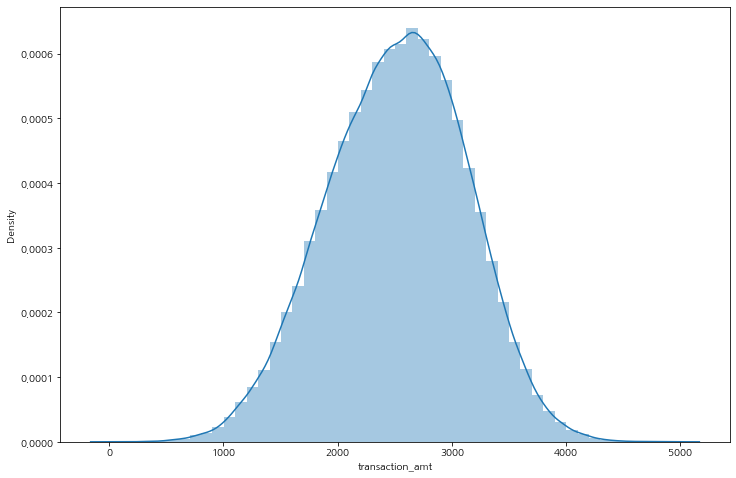

In [33]:
plt.figure(figsize=(12, 8))
sns.distplot(df['transaction_amt'])
plt.show()

In [34]:
df['transaction_amt_gp'] = np.where(df['transaction_amt'] <= 2000, 1, 
                                    np.where(df['transaction_amt'] <= 3000, 2, 3))
df[['transaction_amt', 'transaction_amt_gp']]

,transaction_amt,transaction_amt_gp
0,2167.0,2
1,2045.0,2
2,2892.0,2
3,3040.0,3
4,2976.0,2
...,...,...
149995,2890.0,2
149996,1875.0,1
149997,3371.0,3
149998,2306.0,2


In [35]:
df.groupby(['transaction_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()

,transaction_amt_gp,EVENT_LABEL,transaction_amt
0,1,fraud,353
1,1,legit,29420
2,2,fraud,4825
3,2,legit,79588
4,3,fraud,2826
5,3,legit,29988


In [36]:
# 평균 사기 5% -> 그룹 1, 2, 3 사기 비율이 다르다 : 거래 금액이 클수록 사기 거래 비율이 늘어난다
gp1_3 = df.groupby(['transaction_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()
print(f'gp 1 : {gp1_3.iloc[0, -1] / (gp1_3.iloc[0, -1] + gp1_3.iloc[1, -1])}')
print(f'gp 2 : {gp1_3.iloc[2, -1] / (gp1_3.iloc[2, -1] + gp1_3.iloc[3, -1])}')
print(f'gp 3 : {gp1_3.iloc[4, -1] / (gp1_3.iloc[4, -1] + gp1_3.iloc[5, -1])}')

gp 1 : 0.011856379941557787
gp 2 : 0.057159442266001684
gp 3 : 0.08612177729018101


- transaction_adj_amt 범주형으로

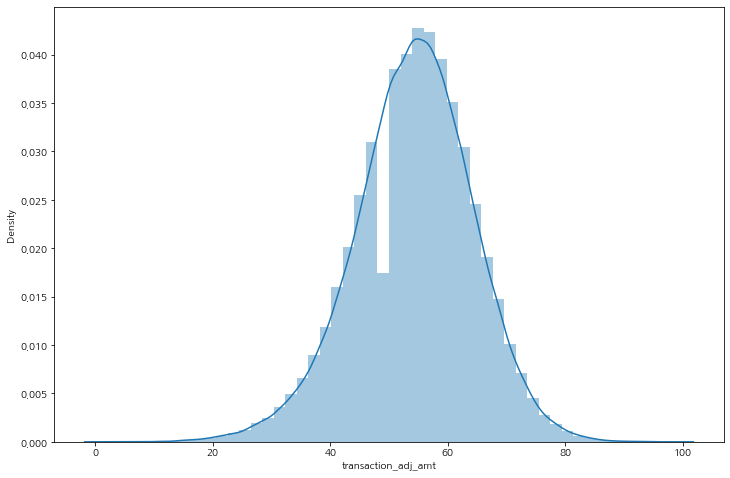

In [37]:
plt.figure(figsize=(12, 8))
sns.distplot(df['transaction_adj_amt'])
plt.show()

In [38]:
df['transaction_adj_amt_gp'] = np.where(df['transaction_adj_amt'] <= 30, 1, 
                                    np.where(df['transaction_adj_amt'] <= 60, 2, 3))
df[['transaction_adj_amt', 'transaction_adj_amt_gp']]

,transaction_adj_amt,transaction_adj_amt_gp
0,56.0,2
1,48.0,2
2,61.0,3
3,28.0,1
4,66.0,3
...,...,...
149995,57.0,2
149996,61.0,3
149997,48.0,2
149998,59.0,2


In [39]:
df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()

,transaction_adj_amt_gp,EVENT_LABEL,transaction_amt
0,1,fraud,1699
1,1,legit,645
2,2,fraud,6060
3,2,legit,99821
4,3,fraud,245
5,3,legit,38530


In [40]:
# 평균 사기 5% -> 그룹 1, 2, 3 사기 비율이 다르다 : 거래 조정 금액이 작을 수록 사기 거래 비율이 늘어난다
gp1_3 = df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'], as_index=False)['transaction_amt'].count()
print(f'gp 1 : {gp1_3.iloc[0, -1] / (gp1_3.iloc[0, -1] + gp1_3.iloc[1, -1])}')
print(f'gp 2 : {gp1_3.iloc[2, -1] / (gp1_3.iloc[2, -1] + gp1_3.iloc[3, -1])}')
print(f'gp 3 : {gp1_3.iloc[4, -1] / (gp1_3.iloc[4, -1] + gp1_3.iloc[5, -1])}')

gp 1 : 0.7248293515358362
gp 2 : 0.057234064657492846
gp 3 : 0.006318504190844616


### 범주형 변수(categorical) 탐색